In [1]:
import hydra
import numpy as np
from omegaconf import OmegaConf
from pymongo import MongoClient
import os
from pathlib import Path

from util import load_db, plot_one_col

In [2]:
coreset_type = 'integer'

metrics = [
    'full_mmd', 
    'final_ed',
]
    
method_record_dict = {
    'PBI-Standard': {
        'problem.remove_burnin': True,
        'debias.alg': 'noop',
        'compress.alg': 'std',
        'compress.coreset_type': coreset_type,
        'out_size': 'n**0.5',
    },

    'Stein Thinning': {
        'debias.alg': 'noop',
        'compress.alg': 'st',
        'compress.coreset_type': coreset_type,
        'out_size': 'n**0.5',
    },
}

if coreset_type == 'integer':
    method_record_dict.update({
        'GBC-EQ': {
            'debias.alg': 'st',
            'compress.alg': 'kt',
            'out_size': 'n**0.5',
        },
        'LBC-EQ(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'cpp',
            'out_size': 'n**0.4',
        },
        'LBC-EQ(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'cpp',
            'out_size': 'n**0.5',
        },
        'PBI-Compress++': {
            'problem.remove_burnin': True,
            'debias.alg': 'noop',
            'compress.alg': 'cpp',
            'out_size': 'n**0.5',
        }
    })
elif coreset_type == 'simplex':
    method_record_dict.update({
        'GBC-CVX(r=n**0.4)': {
            'debias.alg': 'st',
            'compress.alg': 'recomb',
            'out_size': 'n**0.4',
        },
        'GBC-CVX(r=n**0.5)': {
            'debias.alg': 'st',
            'compress.alg': 'recomb',
            'out_size': 'n**0.5',
        },
        'LBC-CVX(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'recomb',
            'out_size': 'n**0.4',
        },
        'LBC-CVX(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'recomb',
            'out_size': 'n**0.5',
        },
        'PBI-CVX': {
            'problem.remove_burnin': True,
            'debias.alg': 'noop',
            'compress.alg': 'recomb',
            'out_size': 'n**0.5',
        }
    })
else:
    assert(coreset_type == 'cp')
    method_record_dict.update({
        'GBC-CP(r=n**0.4)': {
            'debias.alg': 'st',
            'compress.alg': 'chol',
            'out_size': 'n**0.4',
        },
        'GBC-CP(r=n**0.5)': {
            'debias.alg': 'st',
            'compress.alg': 'chol',
            'out_size': 'n**0.5',
        },
        'LBC-CP(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'chol',
            'out_size': 'n**0.4',
        },
        'LBC-CP(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'chol',
            'out_size': 'n**0.5',
        },
        'PBI-CP': {
                'problem.remove_burnin': True,
                'debias.alg': 'noop',
                'compress.alg': 'chol',
                'out_size': 'n**0.5',
        }
    })

ns = [1024, 4096, 16384, 65536, 262144, 1048576]
seeds = [1, 2, 3, 4, 5]
mcmc_names = ['PRECOND-MALA', 'MALA', 'ADA-RW', 'RW']

loaded_results = []
for mcmc_name in mcmc_names:
    cur_dict = method_record_dict.copy()
    for method in cur_dict:
        cur_dict[method]['problem.folder'] = f'../../../riabiz_data/Goodwin/{mcmc_name}'
    loaded_result = load_db(
        'burnin', 
        method_record_dict=cur_dict,
        ns=ns, n_key='problem.num_sample',
        seeds=seeds, seed_key='problem.seed',
        metrics=metrics)
    loaded_results.append(loaded_result)

Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 1, 'debias.alg': 'st', 'compress.alg': 'kt', 'problem.folder': '../../../riabiz_data/Goodwin/PRECOND-MALA', 'compress.out_size': 1024}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 2, 'debias.alg': 'st', 'compress.alg': 'kt', 'problem.folder': '../../../riabiz_data/Goodwin/PRECOND-MALA', 'compress.out_size': 1024}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 3, 'debias.alg': 'st', 'compress.alg': 'kt', 'problem.folder': '../../../riabiz_data/Goodwin/PRECOND-MALA', 'compress.out_size': 1024}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem.num_sample': 1048576, 'problem.seed': 4, 'debias.alg': 'st', 'compress.alg': 'kt', 'problem.folder': '../../../riabiz_data/Goodwin/PRECOND-MALA', 'compress.out_size': 1024}!
Record not found!


xlim for full_mmd: (26.908685288118868, 1217.7480857627868)
ylim for full_mmd: (0.8181630514372543, 153.96090663683748)
xlim for final_ed: (26.908685288118868, 1217.7480857627868)
ylim for final_ed: (0.1515727702200207, 0.15333396664430457)
xlim for full_mmd: (26.908685288118868, 1217.7480857627868)
ylim for full_mmd: (0.8181630514372543, 153.96090663683748)
xlim for final_ed: (26.908685288118868, 1217.7480857627868)
ylim for final_ed: (0.15154131364983253, 0.15399455461825612)
xlim for full_mmd: (26.908685288118868, 1217.7480857627868)
ylim for full_mmd: (0.8181630514372543, 153.96090663683748)
xlim for final_ed: (26.908685288118868, 1217.7480857627868)
ylim for final_ed: (0.15154107316340595, 0.15399456606999073)
xlim for full_mmd: (26.908685288118868, 1217.7480857627868)
ylim for full_mmd: (0.8181630514372543, 153.96090663683748)
xlim for final_ed: (26.908685288118868, 1217.7480857627868)
ylim for final_ed: (0.15154107316340595, 0.15399456606999073)


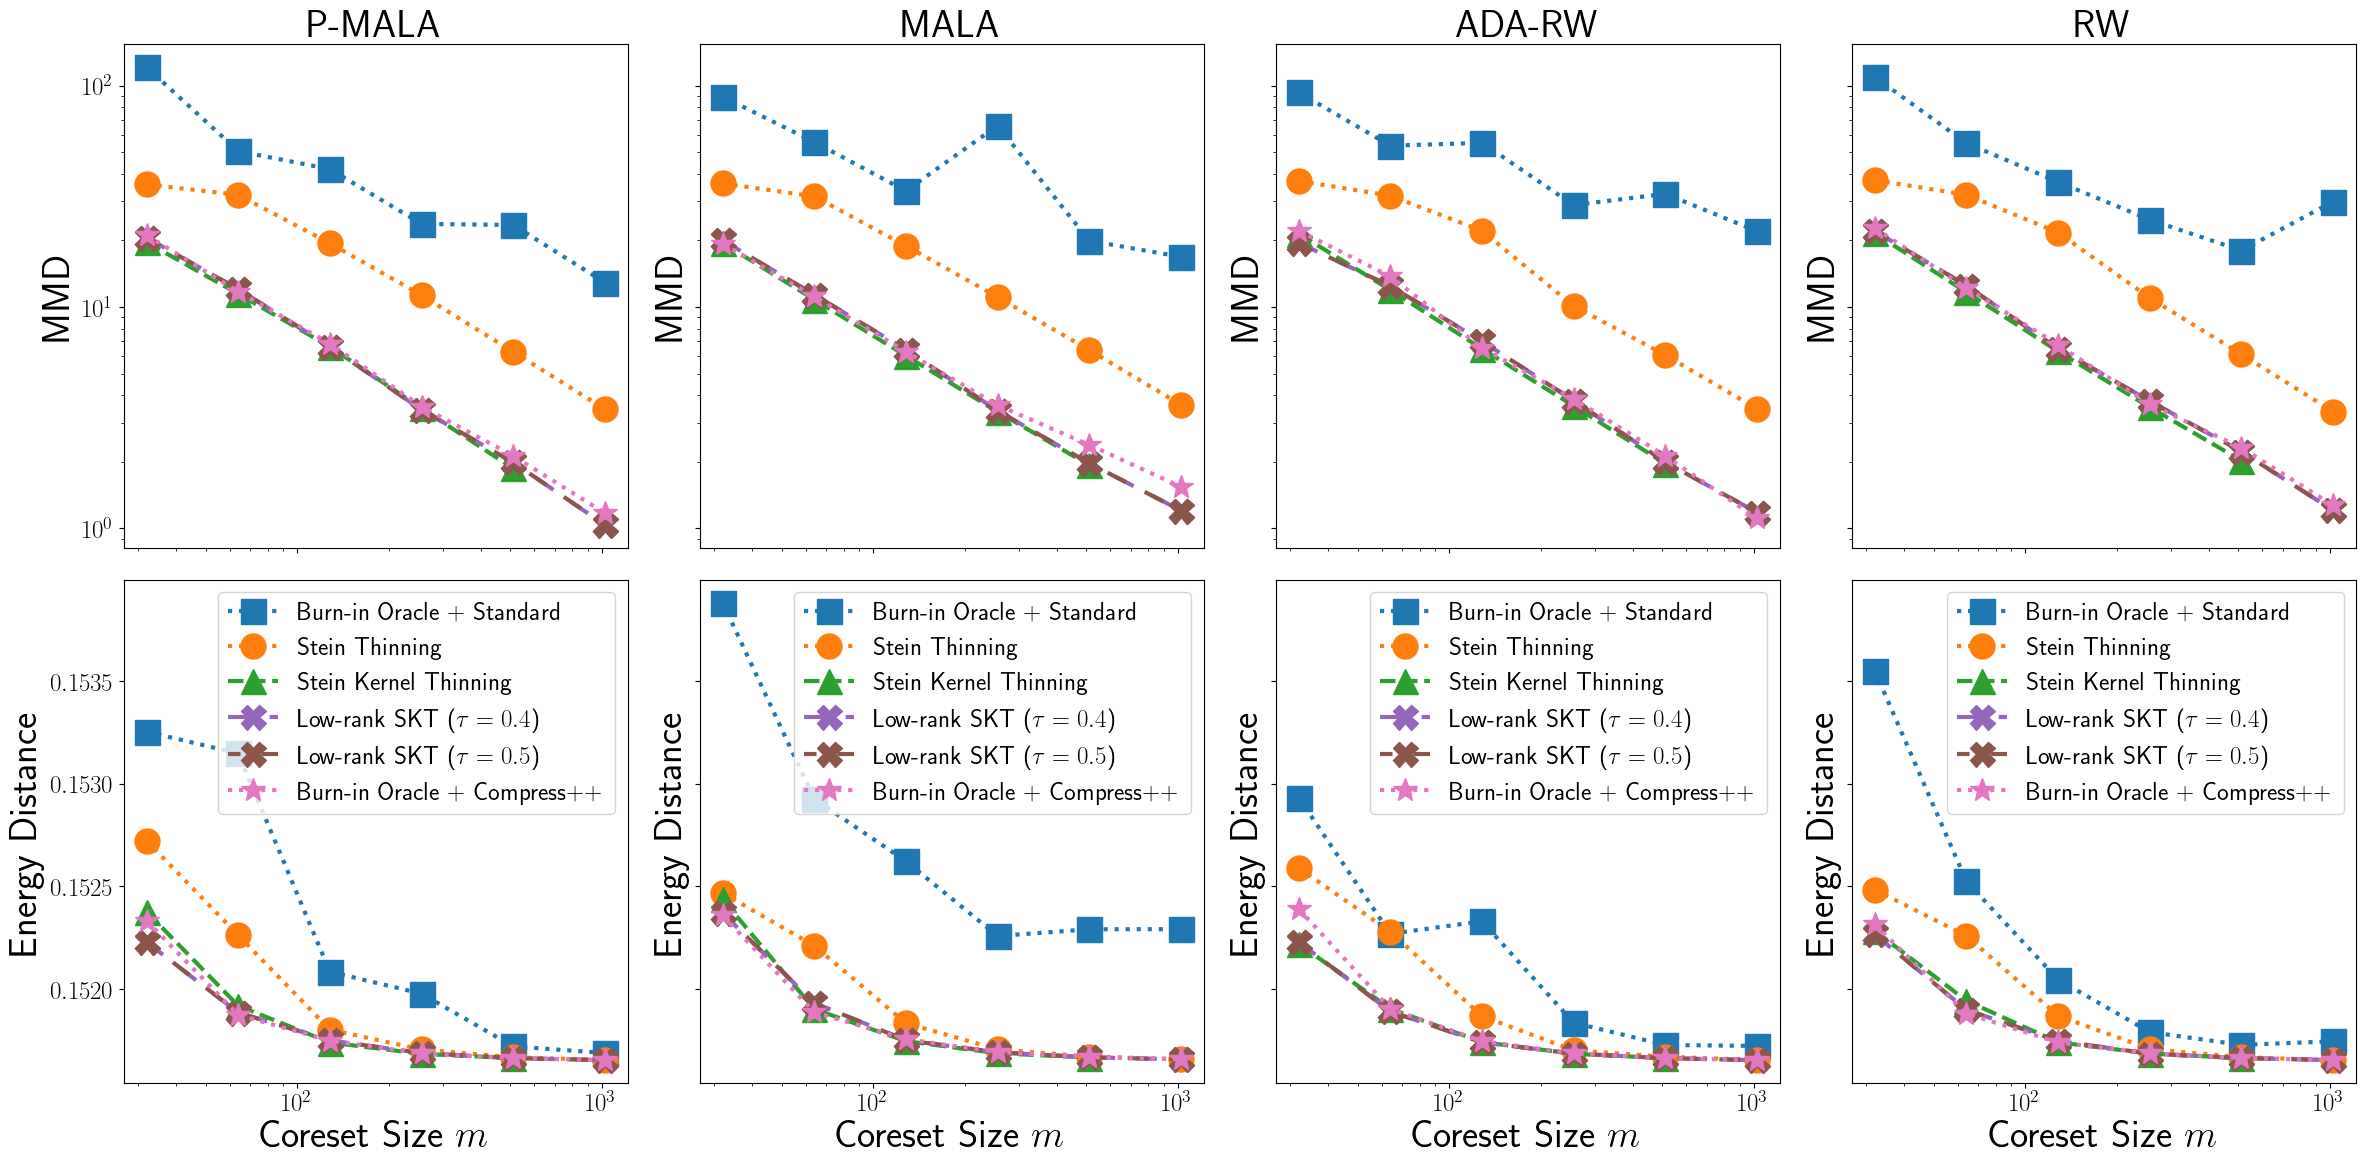

In [3]:
coreset_type_to_title = {
    'integer': 'Equal-Weighted',
    'simplex': 'Simplex-Weighted',
    'cp': 'Constant-Preserving'
}

# metric_y_lim = {
#     'full_mmd': (0.09849892894669099, 153.96090663683748),
#     'final_ed': (0.15146350925215357, 0.153810583360747547),
# }

# x_lim = (26.908685288118868, 1256.8762168437413)

metric_y_lim, x_lim = None, None

# metric_y_lim = {
#     'final_ed': (0.15057148926753142, 0.16),
# }

if len(mcmc_names) == 1:
    titles = [coreset_type_to_title[coreset_type]]
else:
    from style import mcmc_name_to_title
    titles = [f'{mcmc_name_to_title.get(mcmc, mcmc)}' for mcmc in mcmc_names]
plot_one_col(loaded_results, metrics, titles, 
            log_x_axis=True, aspect=1.0, figsize=6, save_path=f'burnin_{coreset_type}.pdf',
            metric_y_lim=metric_y_lim, x_lim=x_lim, share_y='row')